 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import auc
from matplotlib.patches import Polygon



One of the most common probability distribution functions(pdf) that we will come across is the <b>gaussian distribution</b>. This distribution is also known as the <b>normal distribution</b>. As such we can use the terms gaussian and normal interchangeably.  Gaussian distributions are present everywhere, a typical example would be-  the grading of students in a class may be done by using a method called grading on the curve. Other examples include, looking at distrubtion of heights in a population.  We will later on in the course use gaussian distribution to model random variables which is a quintessinal concept in understanding many probability theory concepts used to design machine learning algorithms. 

One must be aware that while we may use normal distributions to model many processes, including defining random varibles, nothing in nature truly follows a normal distribution. In most cases, a normal distibution best approximates a given phenomeneon or a process. 

The gaussian distrubiton also follows from the central limit theorem which states that suppose you take the sum of samples drawn from independent random variables, you will tend to a gaussian. This notebook will focus on explaining the basics of a gaussian distribution. 

The basic form of a gaussian is - <br>
\begin{align}
         \mathcal{N}(x|\mu, \sigma^2) =  \dfrac{1}{ \sqrt{2\pi {\sigma}^2 }} \:  {\large e}^{\: - \dfrac{(x- \mu)^2 }{2 {\sigma}^2} }     
\end{align}
      


Let us look at each variable careful. In the current form, the variables are - <br>
$P$- Probability distribution function <br>
$x$-  the independent variable <br>
$\mu$- the mean of the distribution <br>
$\sigma$ - the standard deviation of the distribution <br> 

One can also use typically use parameter called precision which is precision = $1 / \sigma^2 $. Whether you use sigma or precision can be a matter of choice or convention. 

The notation of $P(x|\mu, \sigma^2) $ is read as the variable $x$ being conditioned on the mean $\mu$ and the standard deviation $\sigma$. 



we are now going to plot a gaussian distribution two ways- first we will calculate it using the above expression secondly we will use the scipy stats model. In the first case, we will write down the expression for the numerator and denominator in python. 

In [9]:
x = np.linspace(-10,10,1000)
mean = 0.0
std =1.0# standard deviation

numerator =  np.exp( -1*np.power((x-mean),2)/(2*(std*std)))
denominator = np.sqrt(2*np.pi*std*std)   

pdf= numerator/denominator


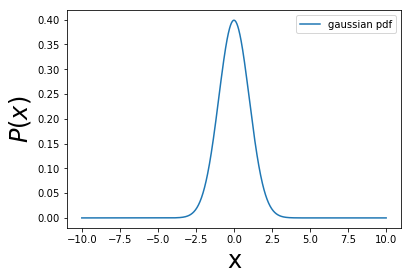

In [10]:
plt.plot(x, pdf, label ='gaussian pdf')
plt.legend()
plt.ylabel('$P(x)$', fontsize =24)
plt.xlabel('x', fontsize= 24)
plt.show()

In [4]:
#Q: convert the above question to a function
# A: below 

def gaussian_pdf(mean, std, x ):
    numerator =  np.exp( -1*np.power((x-mean),2)/(2*(std*std)))
    denominator = np.sqrt(2*np.pi*std*std)   
    px= numerator/denominator
    return px 


In python we can also plot a gaussian using the scipy module, where we call the function norm in the stats submodule, let us choose a different value for mean and standard deviation to show the pdf

In [5]:
from scipy.stats import norm

x = np.linspace(-10,10,1000)

mean = 1.0
std =2.0

pdf_scipy = norm(mean, std).pdf(x)

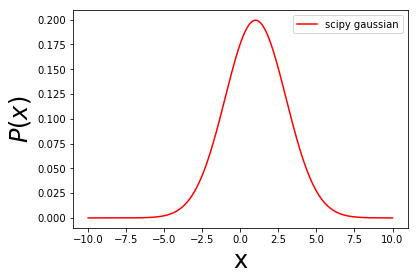

In [6]:
plt.plot(x, pdf_scipy, color= 'red', label = 'scipy gaussian')
plt.legend()
plt.ylabel('$P(x)$', fontsize =24)
plt.xlabel('x', fontsize= 24)
plt.show()

In the below plot, move the sliders around to set various values of mean, standard deviation and range of x values in case of gaussian disribution <br>
To experiment, reduce the value of $\sigma \rightarrow 0 $ and see what happens? <br>
As we reduce the  $\sigma ^2 $ to close zero we notice that the gaussian peak increases in height but reduces in width. As $\sigma^2$ reaches close to 0 we have a sharp peak. Such a distribution function is called a dirac delta function


In [7]:

mean = widgets.FloatSlider(min=-10.0, max=10.0, step=0.05,continuous_update =False )
std = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=2.0,continuous_update =False)
xrange = widgets.FloatSlider(min=3.0, max=200.0, step=0.05, value=10.0,continuous_update =False)

def printer(mean, std, xrange):
    
    xval = np.linspace(-xrange,xrange,1000)
    pdf=  gaussian_pdf(mean,std,xval)
    plt.figure(figsize=(4,4))
    plt.plot(xval,pdf)
    plt.ylim([0,0.3])
    plt.ylabel('$P(x)$', fontsize =24)
    plt.xlabel('x', fontsize= 24)
    plt.show()
    
    return mean, std,xrange

interact_object = interactive(printer,mean=mean, std=std, xrange =xrange)
output = interact_object.children[-1]
output.layout.height = '250px'
ui = widgets.HBox([mean, std, xrange])

display(ui, output)

HBox(children=(FloatSlider(value=0.0, continuous_update=False, description='mean', max=10.0, min=-10.0, step=0.05), FloatSlider(value=2.0, continuous_update=False, description='std', max=10.0, min=0.5, step=0.05), FloatSlider(value=10.0, continuous_update=False, description='xrange', max=200.0, min=3.0, step=0.05)))

Output(layout=Layout(height='250px'))

In the above plot we observe that as we change value of the standard deviation while the height of the distribution increases, the distribution also becomes sharper. In fact, in the case of dirac delta function, the distribution is essentially infinitely sharp, since $\sigma \rightarrow 0$. Let us now look at the what happens to the area under the curve of a gaussian as we change $\sigma$ <br>

We can calculate the area under the curve for a gaussian using the scipy function called auc, which uses the trapezoid rule to calculate the area under the curve. We can be certain that changing the mean does affect area under the curve, since all you are doing is moving distribution around 

In this demonstration try the following, change values of d

In [45]:

std = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=2.0, continuous_update =False)

def printer(std):
    xrange= 40.0
    mean= 0.0 
    xval = np.linspace(-xrange,xrange,50)
    pdf=  gaussian_pdf(mean,std,xval)
    
    
    ix = np.linspace(-xrange, xrange)
    iy = gaussian_pdf(mean,std,ix)
    verts = [(-xrange, 0)] + list(zip(ix, iy)) + [(xrange, 0)]
    poly = Polygon(verts, facecolor='0.82', edgecolor='0.5', alpha =1.0)
    
    auc_value =auc(xval,pdf)
    
    fig, ax = plt.subplots(figsize=(7,7))
    
    plt.plot(xval,pdf, color= 'red')
    plt.ylim([0,0.3])
    plt.ylabel('$P(x)$', fontsize =20)
    plt.xlabel('x', fontsize= 20)
    plt.title('Auc value:'+ str(round(auc_value,3)), fontsize =24)
    ax.add_patch(poly)

    plt.show()
    
#     print('Auc value:', auc_value)
    return mean, std,xrange

interact_object = interactive(printer, std=std)
output = interact_object.children[-1]
output.layout.height = '500px'
interact_object

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='std', max=10.0, min=0.5, step=0.05), Output(layout=Layout(height='500px'))), _dom_classes=('widget-interact',))

You will observe that the area under the curve stays the same as you change the value of the standard deviation. This shows another property of a gaussian distribution, that the area under the curve will remain close to 1 even if you change the parameters of a gaussian.  

We can plot the gaussian distribution in terms of the standard deviation as well. 

In [35]:
#  gaussian in terms of standard deviations
mean = widgets.FloatSlider(min=-10.0, max=10.0, step=0.05,continuous_update =False )
std = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=2.0,continuous_update =False)
xrange = widgets.FloatSlider(min=3.0, max=200.0, step=0.05, value=10.0,continuous_update =False)

def printer(mean, std, xrange):
    xrange_std= xrange/std
    xval = np.linspace(-xrange_std,xrange_std,1000)
    pdf=  gaussian_pdf(mean,std,xval)
    plt.figure(figsize=(8,8))
    plt.plot(xval,pdf, label= 'pdf $\sigma$')
    plt.ylim([0,0.3])
    plt.legend()
    plt.ylabel('$P(\sigma)$', fontsize =24)
    plt.xlabel('$\sigma$', fontsize= 24)
    plt.show()
    
    return mean, std,xrange

interact_object = interactive(printer,mean=mean, std=std, xrange =xrange)
output = interact_object.children[-1]
output.layout.height = '550px'
output.layout.align_content ='center'
ui = widgets.HBox([mean, std, xrange])

display(ui, output)

HBox(children=(FloatSlider(value=0.0, continuous_update=False, description='mean', max=10.0, min=-10.0, step=0.05), FloatSlider(value=2.0, continuous_update=False, description='std', max=10.0, min=0.5, step=0.05), FloatSlider(value=10.0, continuous_update=False, description='xrange', max=200.0, min=3.0, step=0.05)))

Output(layout=Layout(align_content='center', height='550px'))

We can also plot the cumulative distribution for the function for a gaussian which is given by- <br>

\begin{align}
         \Phi = \dfrac{1}{2}\big[1+erf\dfrac{(x- \mu)}{2\sigma^2} \big]
\end{align}

where $erf$ is the error function - 
\begin{align}
             erf(x) = \dfrac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
\end{align}



The cumulative function for the normal function looks a bit messy for us to code up from first principles, so lets go back to scipy.stats for help with this 


In [46]:
mean = widgets.FloatSlider(min=-10.0, max=10.0, step=0.05, value = 0.0,continuous_update =False )
std = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=1.0,continuous_update =False)
xrange = widgets.FloatSlider(min=1.0, max=10.0, step=0.05, value=10.0,continuous_update =False)
vline = widgets.FloatSlider(min=1.0, max=10.0, step=0.05, value=1.0,continuous_update =False)

def printer(mean, std, xrange,vline):

    xval = np.linspace(-xrange,xrange,1000)
    cdf=  norm.cdf(xval,mean,std)
    plt.figure(figsize=(8,8))
    plt.plot(xval,cdf, label= 'cdf')
    
    plt.ylim([0,1.0])
    plt.legend()
    plt.ylabel('$\Phi(x)$', fontsize =24)
    plt.xlabel('$x$', fontsize= 24)
    plt.show()
    
    return mean, std,xrange

interact_object = interactive(printer,mean=mean, std=std, xrange =xrange,vline = vline )
output = interact_object.children[-1]
output.layout.height = '550px'
ui = widgets.HBox([mean, std, xrange])

display(ui, output)


HBox(children=(FloatSlider(value=0.0, continuous_update=False, description='mean', max=10.0, min=-10.0, step=0.05), FloatSlider(value=1.0, continuous_update=False, description='std', max=10.0, min=0.5, step=0.05), FloatSlider(value=10.0, continuous_update=False, description='xrange', max=10.0, min=1.0, step=0.05)))

Output(layout=Layout(height='550px'))